# 0. Setup Paths

In [2]:
import os
import wget
import object_detection

on tf Model Zoo Website (https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)
- right click on model to get url
- copy name part of url to use as name

In [3]:
CUSTOM_MODEL_NAME = 'my_faster_rcnn_resnet101_v1_1024' 
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations',CUSTOM_MODEL_NAME),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
# creating folders
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [7]:
print(paths['CHECKPOINT_PATH'])
print(paths['ANNOTATION_PATH'])
print(paths['CHECKPOINT_PATH'])

Tensorflow\workspace\models\my_faster_rcnn_resnet101_v1_1024
Tensorflow\workspace\annotations\my_faster_rcnn_resnet101_v1_1024
Tensorflow\workspace\models\my_faster_rcnn_resnet101_v1_1024


# 1. Load pre-trained Model

In [8]:
#VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
#!python {VERIFICATION_SCRIPT}

In [9]:
#!pip list

In [10]:
# download model from tf model zoo
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  0% [                                                                      ]   2105344 / 353893393

  1% [                                                                      ]   4194304 / 353893393

  2% [.                                                                     ]   8331264 / 353893393

  2% [..                                                                    ]  10436608 / 353893393

  3% [..                                                                    ]  12877824 / 353893393

  4% [..                                                                    ]  15007744 / 353893393

  4% [...                                                                   ]  17195008 / 353893393

  5% [...                                                                   ]  19316736 / 353893393

  6% [....                                                                  ]  21585920 / 353893393

  6% [....                                                                  ]  23879680 / 353893393

  7% [.....                                                                 ]  26075136 / 353893393

  7% [.....                                                                 ]  28180480 / 353893393

  8% [.....                                                                 ]  30187520 / 353893393

  9% [......                                                                ]  32514048 / 353893393

  9% [......                                                                ]  34840576 / 353893393

 10% [.......                                                               ]  37003264 / 353893393

 11% [.......                                                               ]  39288832 / 353893393

 11% [........                                                              ]  41410560 / 353893393

 12% [........                                                              ]  43802624 / 353893393

 12% [.........                                                             ]  45981696 / 353893393

 13% [.........                                                             ]  48037888 / 353893393

 14% [.........                                                             ]  50298880 / 353893393

 14% [..........                                                            ]  52576256 / 353893393

 15% [..........                                                            ]  54755328 / 353893393

 16% [...........                                                           ]  56934400 / 353893393

 16% [...........                                                           ]  59129856 / 353893393

 17% [............                                                          ]  61292544 / 353893393

 17% [............                                                          ]  63635456 / 353893393

 18% [............                                                          ]  65716224 / 353893393

 19% [.............                                                         ]  67764224 / 353893393

 19% [.............                                                         ]  70107136 / 353893393

 20% [..............                                                        ]  72261632 / 353893393

 21% [..............                                                        ]  74596352 / 353893393

 21% [...............                                                       ]  76611584 / 353893393

 22% [...............                                                       ]  78913536 / 353893393

 22% [................                                                      ]  81092608 / 353893393

 23% [................                                                      ]  83378176 / 353893393

 24% [................                                                      ]  85590016 / 353893393

 24% [.................                                                     ]  87875584 / 353893393

 25% [.................                                                     ]  89251840 / 353893393

 25% [.................                                                     ]  90701824 / 353893393

 26% [..................                                                    ]  93388800 / 353893393

 26% [..................                                                    ]  94396416 / 353893393

 27% [...................                                                   ]  96509952 / 353893393

 28% [...................                                                   ] 100614144 / 353893393

100% [......................................................................] 353893393 / 353893393        1 file(s) moved.


x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/checkpoint/
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/checkpoint/checkpoint
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.index
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/pipeline.config
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model.pb
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/variables/
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [11]:
labels = [{'name':'Bubble', 'id':1}]

# write into label map file
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records
- binary storage format
- convert annotations and images into format for training
- storing data as sequence of binary strings has impact on training time
- (less space on disk, copy faster, read efficiently)

In [12]:
# create TFRecord file
# --> train and test record file within annotations path
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\my_faster_rcnn_resnet101_v1_1024\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\my_faster_rcnn_resnet101_v1_1024\test.record


# 4. Copy Model Config to Training Folder
- pipeline.config defines architecture of model
- contains e.g. prebuilt data augmentation
- see pipeline file in pre-trained model folder --> preset configurations (e.g. data augmentation etc.)

In [13]:
# copy pipeline.config into my_model folder
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning
config file: change parameter of the model

In [14]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [15]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': faster_rcnn {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 1024
       width: 1024
     }
   }
   feature_extractor {
     type: "faster_rcnn_resnet101_keras"
     batch_norm_trainable: true
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_objectness_loss_weight: 1.0
   initi

In [42]:
#ckeys = config.keys()
#print(type(ckeys))
#print(list(ckeys)[0])

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

MODIFY FIRST LINE!
- pipeline_config.model.###
- insert model name (shown in first line of config file)

In [19]:
# modify pipeline.config for personal use case (num classes, set paths etc.)
pipeline_config.model.faster_rcnn.num_classes = len(labels)
pipeline_config.train_config.batch_size = 1
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [20]:
print([os.path.join(paths['ANNOTATION_PATH'], 'test.record')])

['Tensorflow\\workspace\\annotations\\my_faster_rcnn_resnet101_v1_1024\\test.record']


In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model
Before Training, my_model directory must be empty!

In [22]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [23]:
# test if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [26]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [27]:
# to see training status, copy command to prompt and run from there
# (from tfodCourse directory and with activated environment)
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_faster_rcnn_resnet101_v1_1024 --pipeline_config_path=Tensorflow\workspace\models\my_faster_rcnn_resnet101_v1_1024\pipeline.config --num_train_steps=5000


- runs model_main_tf2.py
- arguments passed:
    - model directory
    - directory of pipeline.config
    - number of training steps

In [72]:
#!{command}

2021-11-03 15:47:23.163135: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-03 15:47:23.842984: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2819 MB memory:  -> device: 0, name: Quadro M1200, pci bus id: 0000:01:00.0, compute capability: 5.0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1103 15:47:24.118669 13032 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I1103 15:47:24.123667 13032 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwri

INFO:tensorflow:Step 100 per-step time 0.773s
I1103 15:49:26.603330 13032 model_lib_v2.py:698] Step 100 per-step time 0.773s
INFO:tensorflow:{'Loss/classification_loss': 0.38493288,
 'Loss/localization_loss': 0.59821117,
 'Loss/regularization_loss': 0.15467642,
 'Loss/total_loss': 1.1378205,
 'learning_rate': 0.0319994}
I1103 15:49:26.603330 13032 model_lib_v2.py:701] {'Loss/classification_loss': 0.38493288,
 'Loss/localization_loss': 0.59821117,
 'Loss/regularization_loss': 0.15467642,
 'Loss/total_loss': 1.1378205,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 0.386s
I1103 15:50:05.228297 13032 model_lib_v2.py:698] Step 200 per-step time 0.386s
INFO:tensorflow:{'Loss/classification_loss': 0.31399024,
 'Loss/localization_loss': 0.4014231,
 'Loss/regularization_loss': 0.15486695,
 'Loss/total_loss': 0.87028027,
 'learning_rate': 0.0373328}
I1103 15:50:05.228297 13032 model_lib_v2.py:701] {'Loss/classification_loss': 0.31399024,
 'Loss/localization_loss': 0.4014231

# 7. Evaluate the Model
Calculate performance metrics

In [61]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [62]:
# command can be run from prompt to see progress
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_resnet50_v1_fpn640 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_resnet50_v1_fpn640\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_resnet50_v1_fpn640


In [75]:
#!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.035
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.325
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.050
 A

W1103 16:03:43.788491 17756 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1103 16:03:43.789491 17756 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1103 16:03:43.789491 17756 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1103 16:03:43.789491 17756 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1103 16:03:43.789491 17756 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-11-03 16:03:43.795207: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To 

I1103 16:04:26.952852 17756 model_lib_v2.py:1007] Eval metrics at step 2000
INFO:tensorflow:	+ DetectionBoxes_Precision/mAP: 0.092891
I1103 16:04:26.955851 17756 model_lib_v2.py:1010] 	+ DetectionBoxes_Precision/mAP: 0.092891
INFO:tensorflow:	+ DetectionBoxes_Precision/mAP@.50IOU: 0.254012
I1103 16:04:26.959856 17756 model_lib_v2.py:1010] 	+ DetectionBoxes_Precision/mAP@.50IOU: 0.254012
INFO:tensorflow:	+ DetectionBoxes_Precision/mAP@.75IOU: 0.061814
I1103 16:04:26.965859 17756 model_lib_v2.py:1010] 	+ DetectionBoxes_Precision/mAP@.75IOU: 0.061814
INFO:tensorflow:	+ DetectionBoxes_Precision/mAP (small): 0.001661
I1103 16:04:26.968851 17756 model_lib_v2.py:1010] 	+ DetectionBoxes_Precision/mAP (small): 0.001661
INFO:tensorflow:	+ DetectionBoxes_Precision/mAP (medium): 0.274420
I1103 16:04:26.971855 17756 model_lib_v2.py:1010] 	+ DetectionBoxes_Precision/mAP (medium): 0.274420
INFO:tensorflow:	+ DetectionBoxes_Precision/mAP (large): -1.000000
I1103 16:04:26.975855 17756 model_lib_v2.py:1

# See Evaluation graphically with Tensorboard
- Eval folder: \TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet\eval --> AV, AR
- Train folder: \TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet\train --> losscurve

in prompt: go to directory

run command: tensorboard --logdir=.
    
open localhost url

## Improve performance
- more imgs of low performing classes to training dataset
- train longer
- change architecture

# 8. Load Train Model From Checkpoint
- my_model folder: check latest checkpoint

In [5]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

Set latest checkpoint for ckpt.restore

In [6]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-21')).expect_partial()

# set detection function
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

replace with name of image in image path

In [12]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.02533422-940e-11eb-9dbd-5cf3709bbcc6.jpg')

In [ ]:
IMAGE_PATH

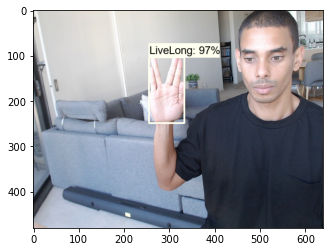

In [13]:
# loading image
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# converting to a tensor
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
# call detection function
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

# visualization
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Freezing the Graph
- saving slice of model for later usage
- pick up on training from here by resetting fine tune checkpoint

- in model folder / export --> pipeline etc. of custom model
- similar appearance to pre-trained models from TF Model Zoo

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS
- saving model in tfjs format to use for web applications (e.g. OD web app)

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')